In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/California_Houses.csv")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [ ]:
inputs = ['Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']
output = ['Median_House_Value']

In [ ]:
dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=10)

In [ ]:
regression = LinearRegression()
regression.fit(dfTrain[inputs], dfTrain[output])

LinearRegression()

In [ ]:
regression.coef_

array([[ 3.93020390e+04,  9.21787349e+02, -6.37930844e+00,
         1.13579185e+02, -3.49795266e+01,  2.80108601e+01,
        -4.44119437e+04, -2.89682814e+04, -2.26101437e-01,
        -1.35384997e-01,  2.22176457e-01,  1.53847973e-01,
        -1.28849908e-01]])

In [ ]:
regression.intercept_

array([-1907956.16322239])

In [ ]:
dfTrain[inputs].corr()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_Income,1.000000,-0.116141,0.196989,-0.014262,-0.001504,0.007891,-0.081880,-0.013294,-0.244431,-0.066466,-0.056935,-0.036403,-0.021945
Median_Age,-0.116141,1.000000,-0.361096,-0.319681,-0.290721,-0.301599,0.007981,-0.104359,-0.227526,-0.033534,0.032579,-0.085494,-0.096925
Tot_Rooms,0.196989,-0.361096,1.000000,0.926845,0.847551,0.914710,-0.032698,0.042233,0.000456,-0.014030,-0.035557,0.030902,0.031144
Tot_Bedrooms,-0.014262,-0.319681,0.926845,1.000000,0.868092,0.979297,-0.065749,0.068727,-0.021381,-0.053612,-0.067142,0.061455,0.061408
Population,-0.001504,-0.290721,0.847551,0.868092,1.000000,0.897934,-0.107275,0.099470,-0.039056,-0.107260,-0.108124,0.080515,0.089241
Households,0.007891,-0.301599,0.914710,0.979297,0.897934,1.000000,-0.070720,0.055400,-0.062405,-0.059660,-0.068665,0.049651,0.051319
Latitude,-0.081880,0.007981,-0.032698,-0.065749,-0.107275,-0.070720,1.000000,-0.925678,0.306970,0.942416,0.991666,-0.853670,-0.896591
Longitude,-0.013294,-0.104359,0.042233,0.068727,0.099470,0.055400,-0.925678,1.000000,0.001330,-0.893431,-0.958987,0.922284,0.953845
Distance_to_coast,-0.244431,-0.227526,0.000456,-0.021381,-0.039056,-0.062405,0.306970,0.001330,1.000000,0.201226,0.218655,-0.084039,-0.074614
Distance_to_LA,-0.066466,-0.033534,-0.014030,-0.053612,-0.107260,-0.059660,0.942416,-0.893431,0.201226,1.000000,0.951836,-0.792916,-0.848063


In [ ]:
regression.score(dfTest[inputs], dfTest[output])

0.6473127028039991

In [ ]:
ypred = regression.predict(dfTest[inputs]).flatten()
yactu = dfTest[output].values

<Axes: >

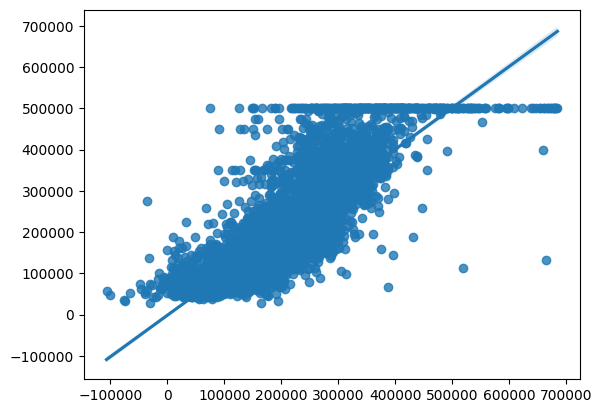

In [ ]:
sns.regplot(x=ypred, y=yactu)